Dataset : New York Stock Exchange

Objective : predict Amazon stocks closing price using linear regression

## 2.1. Buatlah model linear regression untuk memprediksi closing price saham Amazon (Dataset URL). Gunakan file prices-split-adjusted.csv dalam kasus ini.

### 2.1.1 Import Library

In [ ]:
# !pip install feature-engine

In [174]:
# import library

import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score

import joblib
import json

### 2.1.2 Data loading

In [3]:
# Load dataset
raw_data = pd.read_csv('prices-split-adjusted.csv')
raw_data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
# Duplicate data
raw_data_1 = raw_data.copy()

In [5]:
raw_data_2 = raw_data_1[raw_data_1['symbol'] == 'AMZN']
raw_data_2.head()

,date,symbol,open,close,low,high,volume
284,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
751,2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
1219,2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0
1687,2010-01-07,AMZN,132.009995,130.000000,128.800003,132.320007,11030200.0
2155,2010-01-08,AMZN,130.559998,133.520004,129.029999,133.679993,9830500.0


### 2.1.3 Exploratory Data Analysis

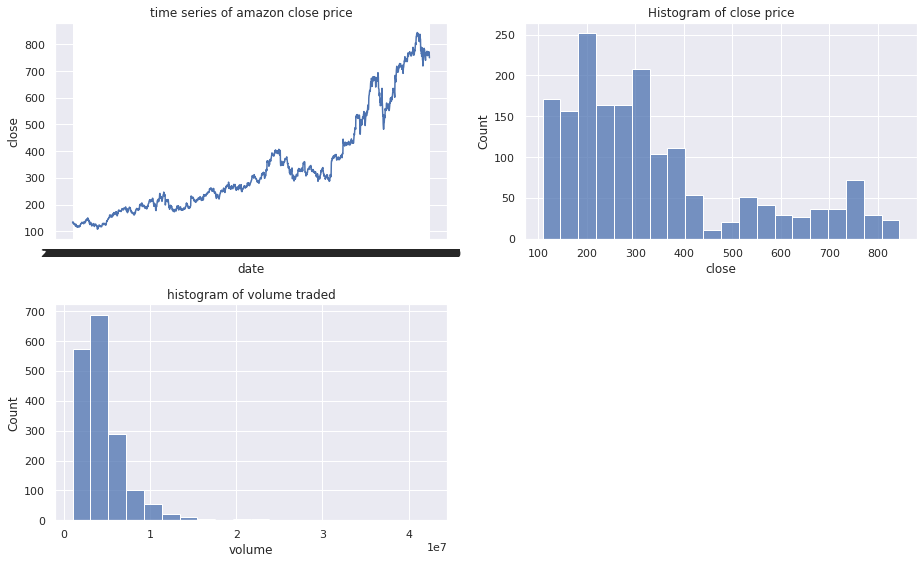

In [176]:
# Create Plot

plt.figure(figsize=(13, 8))
plt.subplot(2,2,1)
sns.lineplot(y = 'close', x= 'date', data= raw_data_2)
plt.title('time series of amazon close price')

# plt.subplot(2,2,2)
# sns.scatterplot(x='price', y='distance', data=data)
# plt.title('price vs distance')

plt.subplot(2,2,2)
sns.histplot(raw_data_2['close'], bins=20)
plt.title('Histogram of close price')

plt.subplot(2,2,3)
sns.histplot(raw_data_2['volume'], bins=20)
plt.title('histogram of volume traded')


plt.tight_layout()
plt.show()

Harga stock amazon Melonjak drastis di tahun 2011an. 

### 2.1.4 Data Preprocessing

#### 2.1.4.1 Splitting data

In [7]:
# define data inference
inf_count =  round(raw_data_2.shape[0]*0.05)
data_inf = raw_data_2.sample(inf_count, random_state=33)
data_inf.head()

,date,symbol,open,close,low,high,volume
709956,2015-11-17,AMZN,650.650024,643.299988,641.000000,653.250000,4320200.0
781313,2016-06-14,AMZN,712.330017,719.299988,712.270020,720.809998,2506900.0
733409,2016-01-27,AMZN,601.989990,583.349976,578.780029,603.390015,5152900.0
100101,2010-11-05,AMZN,169.350006,170.770004,168.589996,171.649994,5212200.0
71492,2010-08-11,AMZN,128.100006,125.889999,125.199997,128.119995,5541700.0


In [8]:
# drop data inference from the main data
raw_data_3 = raw_data_2.drop(data_inf.index)
raw_data_3.shape[0]

1674

In [9]:
data_inf.reset_index(drop=True, inplace=True)
data_inf.head()

,date,symbol,open,close,low,high,volume
0,2015-11-17,AMZN,650.650024,643.299988,641.000000,653.250000,4320200.0
1,2016-06-14,AMZN,712.330017,719.299988,712.270020,720.809998,2506900.0
2,2016-01-27,AMZN,601.989990,583.349976,578.780029,603.390015,5152900.0
3,2010-11-05,AMZN,169.350006,170.770004,168.589996,171.649994,5212200.0
4,2010-08-11,AMZN,128.100006,125.889999,125.199997,128.119995,5541700.0


In [10]:
# define features variable
X = raw_data_3.drop('close', axis=1)
X.head()

,date,symbol,open,low,high,volume
284,2010-01-04,AMZN,136.250000,133.139999,136.610001,7599900.0
751,2010-01-05,AMZN,133.429993,131.809998,135.479996,8851900.0
1219,2010-01-06,AMZN,134.600006,131.649994,134.729996,7178800.0
1687,2010-01-07,AMZN,132.009995,128.800003,132.320007,11030200.0
2155,2010-01-08,AMZN,130.559998,129.029999,133.679993,9830500.0


In [11]:
# define target variable
y = raw_data_3['close']
y.head()

284     133.899994
751     134.690002
1219    132.250000
1687    130.000000
2155    133.520004
Name: close, dtype: float64

In [12]:
# Split between train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=33)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (1422, 6)
Test Size  :  (252, 6)


In [22]:
X_train

,date,symbol,open,low,high,volume
218532,2011-11-04,AMZN,217.649994,214.330002,218.229996,4065800.0
775824,2016-05-27,AMZN,715.000000,711.099976,716.599976,2246400.0
569108,2014-10-01,AMZN,322.040009,315.549988,322.170013,3089100.0
86031,2010-09-24,AMZN,155.429993,155.419998,160.889999,10590600.0
309712,2012-08-14,AMZN,234.710007,232.619995,236.720001,2751000.0
...,...,...,...,...,...,...
612324,2015-02-06,AMZN,374.869995,371.010010,375.989990,3892400.0
321932,2012-09-20,AMZN,260.029999,258.000000,260.869995,2913600.0
283392,2012-05-24,AMZN,216.979996,212.699997,217.660004,3141100.0
192682,2011-08-18,AMZN,191.210007,179.720001,191.339996,8275200.0


#### 2.1.4.2 Handling outlier

In [23]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

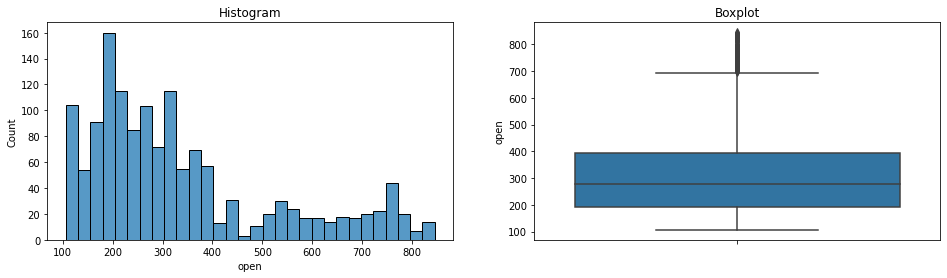

In [24]:
diagnostic_plots(X_train, 'open')

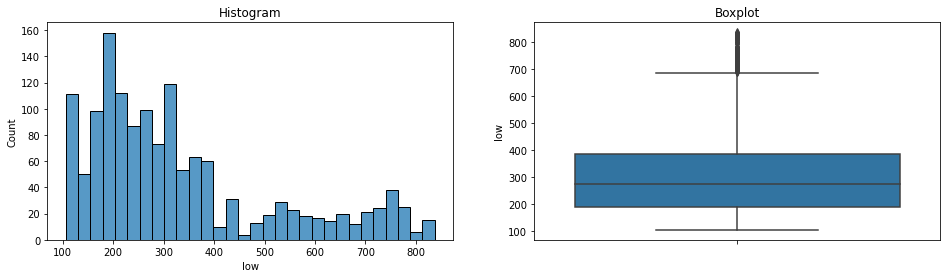

In [25]:
diagnostic_plots(X_train, 'low')

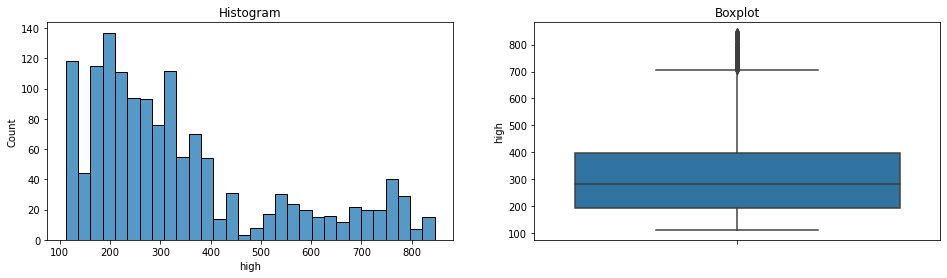

In [26]:
diagnostic_plots(X_train, 'high')

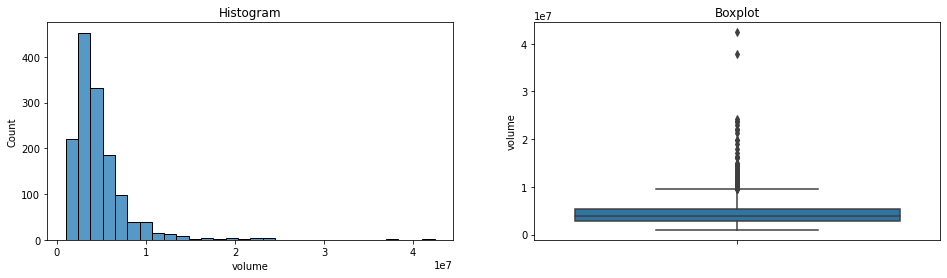

In [27]:
diagnostic_plots(X_train, 'volume')

In [28]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [30]:
# boundary for open prices
upper_open, lower_open = find_skewed_boundaries(X_train, 'open')
print(f'upper bound = {upper_open}')
print(f'lower bound = {lower_open}')

upper bound = 697.6025017500001
lower bound = -111.63749025000004


In [49]:
# boundary for low prices
upper_low, lower_low = find_skewed_boundaries(X_train, 'low')
print(f'upper bound = {upper_low}')
print(f'lower bound = {lower_low}')

upper bound = 686.8750015
lower bound = -108.58500449999997


In [50]:
# boundary for high prices
upper_high, lower_high = find_skewed_boundaries(X_train, 'high')
print(f'upper bound = {upper_high}')
print(f'lower bound = {lower_high}')

upper bound = 704.734976875
lower bound = -111.14498412499998


In [33]:
# boundary for volume
upper_volume, lower_volume = find_skewed_boundaries(X_train, 'volume')
print(f'upper bound = {upper_volume}')
print(f'lower bound = {lower_volume}')

upper bound = 9480737.5
lower bound = -1286962.5


In [38]:
# Count volume above upper bound
upper_bound_count = X_train[X_train['volume'] > upper_volume]
upper_bound_count.shape[0]

84

there is 84 outliers, from the value features

In [102]:
# Drop value beyond the upper bound of volume
X_train_droped_1 = X_train[X_train['volume'] <= upper_volume]

In [103]:
X_train.shape[0]

1422

In [104]:
X_train_droped_1.shape[0]

1338

In [105]:
# index to removed
X_train_index = X_train[X_train['volume'] > upper_volume].index

# clean targets from removed outliers 
y_train_droped_1 = y_train.drop(index=X_train_index)
y_train_droped_1.shape[0]

1338

#### 2.1.4.3 Handling Null values

In [106]:
# Check null values
X_train_droped_1.isnull().sum()

date      0
symbol    0
open      0
low       0
high      0
volume    0
dtype: int64

since there is no null value, we can go to the next process

#### 2.1.4.4 Feature selection

In [107]:
# find corelation between features
X_train_cor = X_train_droped_1.corr() 

<AxesSubplot:>

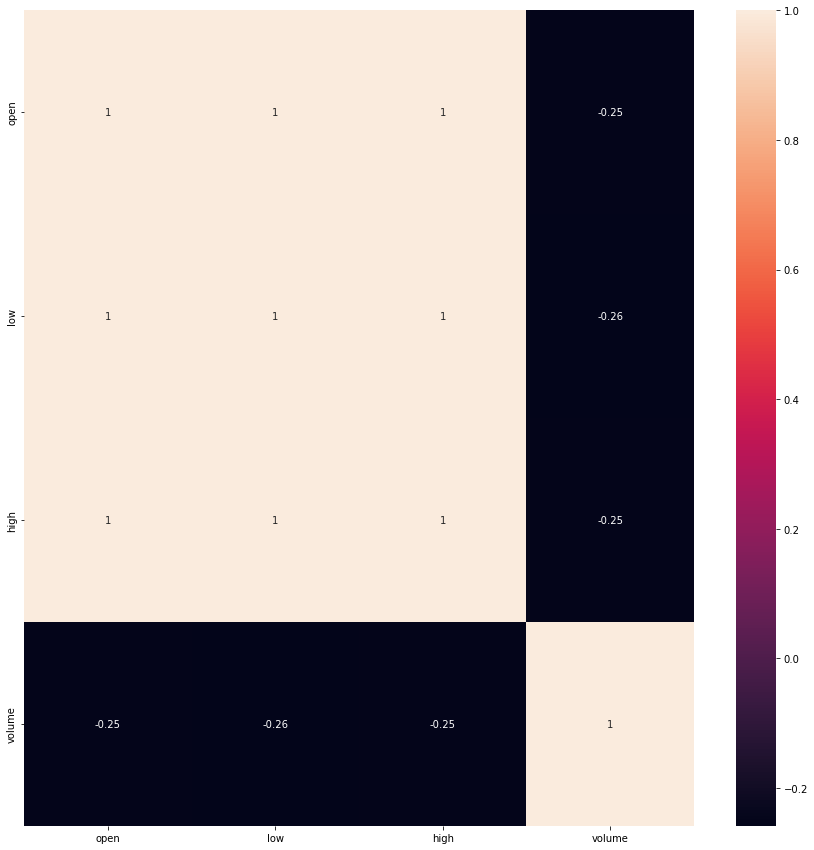

In [108]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train_cor, annot=True)

high, low, and open prices, are highly correlated with each other. we need to drop 1 of these. we choose open to droped

In [127]:
X_train_droped_2 = X_train_droped_1.drop(['open'], axis=1)

In [131]:
# drop symbol
X_train_droped_2.drop(['symbol', 'date'], axis=1, inplace=True)
X_train_droped_2


,low,high,volume
218532,214.330002,218.229996,4065800.0
775824,711.099976,716.599976,2246400.0
569108,315.549988,322.170013,3089100.0
309712,232.619995,236.720001,2751000.0
540688,322.649994,329.980011,2665000.0
...,...,...,...
612324,371.010010,375.989990,3892400.0
321932,258.000000,260.869995,2913600.0
283392,212.699997,217.660004,3141100.0
192682,179.720001,191.339996,8275200.0


now, the data is not corelated anymore

#### 2.1.4.5 split numerical and categorical

In [132]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train_droped_2.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_droped_2.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['low', 'high', 'volume']
Categorical Columns :  []


In [133]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train_droped_2[num_columns]
X_train_cat = X_train_droped_2[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [134]:
X_train_cat.reset_index(drop=True, inplace=True)
X_test_cat.reset_index(drop=True, inplace=True)

#### 2.1.4.6 Scaling

In [135]:
# Define scaler
scaler = MinMaxScaler()

scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.14728704, 0.14509846, 0.3636428 ],
       [0.8270954 , 0.8238362 , 0.1489314 ],
       [0.28580224, 0.28665596, 0.24838028],
       ...,
       [0.14505645, 0.14432218, 0.25451692],
       [0.09992474, 0.10847655, 0.86040337],
       [0.2704208 , 0.27456215, 0.35529934]])

In [136]:
# Create dataframe for X numeric features
X_train_num_1 = pd.DataFrame(X_train_num_scaled, columns =[num_columns])
X_test_num_1 = pd.DataFrame(X_test_num_scaled, columns =[num_columns])


In [137]:
X_train_num_1

,low,high,volume
0,0.147287,0.145098,0.363643
1,0.827095,0.823836,0.148931
2,0.285802,0.286656,0.248380
3,0.172316,0.170280,0.208480
4,0.295518,0.297293,0.198331
...,...,...,...
1333,0.361697,0.359954,0.343179
1334,0.207048,0.203171,0.227669
1335,0.145056,0.144322,0.254517
1336,0.099925,0.108477,0.860403


In [138]:
# Join categorical and numerical features together
X_train_cleaned = X_train_num_1.join(X_train_cat)
X_test_cleaned = X_test_num_1.join(X_test_cat)

In [139]:
#duplicate y_train
y_train_2 = y_train_droped_1.copy()

# reset index on y_train_2
y_train_2.reset_index(drop=True, inplace=True)

In [140]:
y_train_cleaned = pd.DataFrame(y_train_2)
y_train_cleaned

,close
0,216.479996
1,712.239990
2,317.459991
3,233.190002
4,327.920013
...,...
1333,374.279999
1334,260.809998
1335,215.240005
1336,182.520004


### 2.1.5 Model definition

In [141]:
# Training using Linear regression

model_lin_reg = LinearRegression(fit_intercept=True)

### 2.1.6 Model Training

In [142]:
# Train the model

model_lin_reg.fit(X_train_cleaned, y_train_cleaned)

/home/sam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

### 2.1.7 Model Evaluation

In [143]:
y_pred_train = model_lin_reg.predict(X_train_cleaned)
y_pred_test = model_lin_reg.predict(X_test_cleaned)

y_pred_train

/home/sam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/sam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([[216.42084397],
       [714.22367415],
       [319.03699771],
       ...,
       [215.31645734],
       [185.60482412],
       [308.95731051]])

In [145]:
# Model Evaluation using MAE

print('train error: ', mean_absolute_error(y_train_cleaned, y_pred_train))
print('test error: ', mean_absolute_error(y_test, y_pred_test))

train error:  2.0423119043249183
test error:  1.9365935360875628


In [147]:
# Model Evaluation using r^2

print('train error: ', r2_score(y_train_cleaned, y_pred_train))
print('test error: ', r2_score(y_test, y_pred_test))

train error:  0.9997821109563944
test error:  0.999793491633141


mother of god, im not sure, we effe'd up, or this model is really good.. the r2squre is 99.97 %

### 2.1.8 Model saving

In [149]:
with open('model_lin_reg.pkl', 'wb') as file_1:
  joblib.dump(model_lin_reg, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('list_num.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

with open('list_cat_columns.txt', 'w') as file_5:
  json.dump(cat_columns, file_5)

### 2.1.9 Model inference

In [150]:
# load All files

with open('model_lin_reg.pkl', 'rb') as file_1:
  model_lin_reg = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2)

with open('list_num.txt', 'r') as file_4:
  list_num_cols = json.load(file_4)

with open('list_cat_columns.txt', 'r') as file_5:
  list_cat_cols = json.load(file_5)

#### 2.1.9.1 inference

In [151]:
# display inference-set
data_inf

,date,symbol,open,close,low,high,volume
0,2015-11-17,AMZN,650.650024,643.299988,641.000000,653.250000,4320200.0
1,2016-06-14,AMZN,712.330017,719.299988,712.270020,720.809998,2506900.0
2,2016-01-27,AMZN,601.989990,583.349976,578.780029,603.390015,5152900.0
3,2010-11-05,AMZN,169.350006,170.770004,168.589996,171.649994,5212200.0
4,2010-08-11,AMZN,128.100006,125.889999,125.199997,128.119995,5541700.0
...,...,...,...,...,...,...,...
83,2010-05-21,AMZN,117.900002,122.720001,117.519997,124.970001,7966900.0
84,2014-06-16,AMZN,324.859985,327.619995,323.519989,328.690002,2449800.0
85,2014-01-02,AMZN,398.799988,397.970001,394.019989,399.359985,2137800.0
86,2015-09-30,AMZN,505.440002,511.890015,501.670013,512.799988,4004700.0


In [152]:
# split between numerical columns and categorical columns
data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_cols]

data_inf_num

,low,high,volume
0,641.000000,653.250000,4320200.0
1,712.270020,720.809998,2506900.0
2,578.780029,603.390015,5152900.0
3,168.589996,171.649994,5212200.0
4,125.199997,128.119995,5541700.0
...,...,...,...
83,117.519997,124.970001,7966900.0
84,323.519989,328.690002,2449800.0
85,394.019989,399.359985,2137800.0
86,501.670013,512.799988,4004700.0


In [154]:
# feature sfcaling and feature encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)

data_inf_num_scaled

array([[0.7311666 , 0.73755889, 0.3936651 ],
       [0.82869656, 0.82956989, 0.17967358],
       [0.64602124, 0.66965381, 0.49193387],
       [0.0846938 , 0.08166044, 0.49893199],
       [0.02531646, 0.02237626, 0.53781701],
       [0.38374272, 0.38549013, 0.22541511],
       [0.25803628, 0.2552093 , 0.06137815],
       [0.7600958 , 0.76581863, 0.43087435],
       [0.31382825, 0.31265492, 0.24397843],
       [0.75615464, 0.75831447, 0.19866174],
       [0.44265482, 0.44059326, 0.22710268],
       [0.83311665, 0.83974344, 0.24100452],
       [0.69729729, 0.70178135, 0.20044373],
       [0.20413273, 0.20405576, 0.20250894],
       [0.09688676, 0.09936534, 0.71090551],
       [0.17267192, 0.18019502, 0.85427853],
       [0.89483403, 0.88998444, 0.05598499],
       [0.57839203, 0.58392122, 0.23954117],
       [0.10003422, 0.09695476, 0.38140364],
       [0.22081423, 0.21941817, 0.13604447],
       [0.11475881, 0.1126985 , 0.24316414],
       [0.07682518, 0.07259009, 0.41072967],
       [0.

In [156]:
# predict using linear regression
y_pred_inf = model_lin_reg.predict(data_inf_num_scaled)
y_pred_inf

array([[647.42534054],
       [716.89774322],
       [591.28892815],
       [170.24096453],
       [126.76026692],
       [391.13635148],
       [297.35536809],
       [668.38183148],
       [338.83917068],
       [664.20343505],
       [432.92552143],
       [722.22591512],
       [621.91495837],
       [258.84938854],
       [181.17493034],
       [238.54296976],
       [763.28888845],
       [535.15589659],
       [181.4683363 ],
       [270.59618954],
       [192.63175412],
       [164.03958693],
       [184.03297862],
       [216.40575641],
       [299.2959363 ],
       [396.60993686],
       [375.01465055],
       [223.51519482],
       [117.40209615],
       [265.67296251],
       [565.89529954],
       [761.39470073],
       [438.0382459 ],
       [259.03755368],
       [573.45835337],
       [785.78627843],
       [701.55450016],
       [303.55746857],
       [763.55437021],
       [303.78979455],
       [261.48197329],
       [679.86015907],
       [306.12881885],
       [311

In [157]:
# create dataframe of rating pred

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['overall prediction'])
y_pred_inf_df

,overall prediction
0,647.425341
1,716.897743
2,591.288928
3,170.240965
4,126.760267
...,...
83,121.312661
84,326.294774
85,396.913225
86,507.475309


In [158]:
# concate between inference

data_final = pd.concat([data_inf, y_pred_inf_df], axis=1)
data_final

,date,symbol,open,close,low,high,volume,overall prediction
0,2015-11-17,AMZN,650.650024,643.299988,641.000000,653.250000,4320200.0,647.425341
1,2016-06-14,AMZN,712.330017,719.299988,712.270020,720.809998,2506900.0,716.897743
2,2016-01-27,AMZN,601.989990,583.349976,578.780029,603.390015,5152900.0,591.288928
3,2010-11-05,AMZN,169.350006,170.770004,168.589996,171.649994,5212200.0,170.240965
4,2010-08-11,AMZN,128.100006,125.889999,125.199997,128.119995,5541700.0,126.760267
...,...,...,...,...,...,...,...,...
83,2010-05-21,AMZN,117.900002,122.720001,117.519997,124.970001,7966900.0,121.312661
84,2014-06-16,AMZN,324.859985,327.619995,323.519989,328.690002,2449800.0,326.294774
85,2014-01-02,AMZN,398.799988,397.970001,394.019989,399.359985,2137800.0,396.913225
86,2015-09-30,AMZN,505.440002,511.890015,501.670013,512.799988,4004700.0,507.475309


In [160]:
data_final[['close', 'overall prediction']]

,close,overall prediction
0,643.299988,647.425341
1,719.299988,716.897743
2,583.349976,591.288928
3,170.770004,170.240965
4,125.889999,126.760267
...,...,...
83,122.720001,121.312661
84,327.619995,326.294774
85,397.970001,396.913225
86,511.890015,507.475309


In [162]:
# r2 score for data inf
r2_score(data_final['close'], data_final['overall prediction'])

0.9998362230375812

In [179]:
# Get intercept and slop

print('intercept: ', model_lin_reg.intercept_)
print('slope: ', model_lin_reg.coef_)

intercept:  [109.28521287]
slope:  [[ 3.69563336e+02  3.63272457e+02 -1.79588497e-02]]


In [180]:
list_num_cols

['low', 'high', 'volume']

### 2.1.10 Pengambilan Kesimpulan:

Kesimpulan yang dapat diambil adalah, nilai low dan high setiap harinya, sangat mempengaruhi nilai close price yang akan di prediksi. sedangkan nilai volume tidak terlalu memberikan efek yang signifikan



## 2.2. Buatlah visualisasi yang menampilkan closing price saham Amazon, Cisco, Apple, dan Netflix berdasarkan date (time series). Saham apa yang memiliki closing price tertinggi dan terendah di akhir tahun 2014, 2015 dan 2016?



In [178]:
# define data for every company needed
price_data_amazon = raw_data_2.copy()
price_data_cisco = raw_data_1[raw_data_1['symbol'] == 'CSCO']
price_data_apple = raw_data_1[raw_data_1['symbol'] == 'AAPL']
price_data_netflix = raw_data_1[raw_data_1['symbol'] == 'NFLX']

In [ ]:
# Create Plot

plt.figure(figsize=(13,13))
plt.subplot(2,2,1)
sns.lineplot(y = 'close', x= 'date', data= price_data_amazon)
plt.title('time series of amazon close price')

plt.subplot(2,2,2)
sns.lineplot(y = 'close', x= 'date', data= price_data_cisco)
plt.title('time series of cisco close price')

plt.subplot(2,2,3)
sns.lineplot(y = 'close', x= 'date', data= price_data_apple)
plt.title('time series of apple close price')

plt.subplot(2,2,4)
sns.lineplot(y = 'close', x= 'date', data= price_data_netflix)
plt.title('time series of netflix close price')


plt.tight_layout()
plt.show()

## 2.3. BBuatlah model Logistic Regression untuk memprediksi Loan Pay Back (Dataset URL). Gunakan file loan_data.csv dalam kasus ini.


### 2.3.1. Import library

In [177]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

### 2.3.2. Data loading

In [182]:
df = pd.read_csv('loan_data.csv')

In [183]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
